<a href="https://colab.research.google.com/github/Kayalks/deep_learning/blob/master/image_classification/cnn_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CNN Image Classification**                

# Import Libraries

In [1]:
import keras.utils
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab.patches import cv2_imshow


# Building the Classifier

In [32]:
class CNNClassifier:
    def __init__(self):
        # Initializing the class variables
        (self.X_train,self.y_train),(self.X_test,self.y_test) = datasets.cifar10.load_data()
        self.y_train = self.y_train.reshape(-1,)
        self.y_test = self.y_test.reshape(-1, )
        self.classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
        self.X_train_scaled = None
        self.X_test_scaled = None
        self.y_train_categorical = None
        self.y_test_categorical = None

    def plot_sample(self,X,y,index):
        # Plot sample data
        plt.figure(figsize=(15,2))
        plt.imshow(X[index])
        plt.xlabel(self.classes[y[index]])
        plt.show()

    def normalize_data(self):
        ## Normalization of the data
        self.X_train_scaled = self.X_train/255
        self.X_test_scaled = self.X_test/255
        #self.y_train_categorical = keras.utils.to_categorical(self.y_train,num_classes=10,dtype='float32')
        #self.y_test_categorical = keras.utils.to_categorical(self.y_test,num_classes=10,dtype='float32')

    def cnnModel(self,epochs):
        # Building a CNN model
        model = keras.Sequential([
            #cnn layers
            layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),

            #dense layers
            keras.layers.Flatten(),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
        ])

        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        model.fit(self.X_train_scaled, self.y_train, epochs=epochs)
        return model

    def sample_NNmodel(self):
        # Building a simple ANN model
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])
        model.compile(optimizer='SGD',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        model.fit(self.X_train_scaled,self.y_train, epochs=5)
        return model

    def generate_classifcation_report(self,model):
        # generate the classification report and return the predictions
        y_pred = model.predict(self.X_test_scaled)
        y_pred_classes = [np.argmax(element) for element in y_pred]

        print("Classification report: \\n",classification_report(self.y_test,y_pred_classes))
        return y_pred_classes

Data Summary
X_train:  (50000, 32, 32, 3)
X_test:  (10000, 32, 32, 3)
y_train:  (50000,)
y_test:  (10000,)


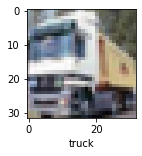

In [33]:

# initialize the object instance for the classifier class
cnn = CNNClassifier()
print('Data Summary')
print("X_train: ",cnn.X_train.shape)
print("X_test: ", cnn.X_test.shape)
print("y_train: ", cnn.y_train.shape)
print("y_test: ", cnn.y_test.shape)
cnn.plot_sample(cnn.X_train,cnn.y_train,1)

# normalize the dataset
cnn.normalize_data()


In [34]:
print(cnn.X_train_scaled.shape)

(50000, 32, 32, 3)


In [35]:
## Executing the simple ANN
model = cnn.sample_NNmodel()
print("Model Evaluation for NN: \\n",model.evaluate(cnn.X_test_scaled,cnn.y_test))
y_classes = cnn.generate_classifcation_report(model)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8113 - accuracy: 0.3563
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6231 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5391 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4795 - accuracy: 0.4817
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.4912 - accuracy: 0.4705
Model Evaluation for NN: \n [1.491239309310913, 0.47049999237060547]
Classification report: \n               precision    recall  f1-score   support

           0       0.48      0.58      0.53      1000
           1       0.41      0.78      0.54      1000
           2       0.44      0.29      0.35      1000
           3       0.32      0.39      0.35      1000
           4       0.58      0.20      0.30      1000
           5       0.41      0.31      0.35      1000
           6       0.55

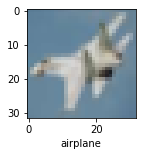

In [37]:
#Plot a sample data
cnn.plot_sample(cnn.X_test,cnn.y_test,10)

In [38]:
# verify the predictions
cnn.classes[y_classes[10]]

'ship'

A simple ANN couldnt classify the image correctly. IT is a dog and the model predicted it as a frog

In [39]:
import seaborn as sns

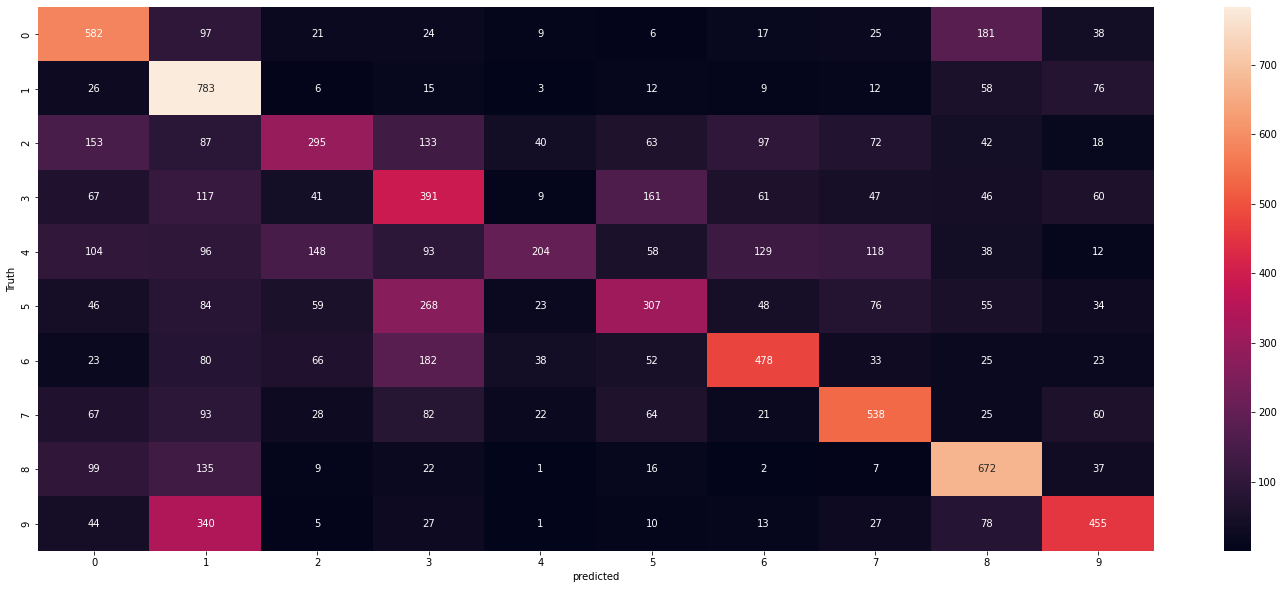

In [40]:
## Confusion Matrix for performance
cm = confusion_matrix(cnn.y_test,y_classes)
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()


We could see that there are so many miss classifications.

In [41]:
## Executing the CNN model
model = cnn.cnnModel(epochs = 20)
print("Model Evaluation for CNN: \\n", model.evaluate(cnn.X_test_scaled, cnn.y_test))
y_classes = cnn.generate_classifcation_report(model)

Epoch 1/20
1563/1563 [==============================] - 6s 3ms/step - loss: 1.5442 - accuracy: 0.4368
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1767 - accuracy: 0.5856
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0105 - accuracy: 0.6472
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9158 - accuracy: 0.6822
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8394 - accuracy: 0.7087
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7789 - accuracy: 0.7283
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7229 - accuracy: 0.7481
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6747 - accuracy: 0.7647
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6326 - accuracy: 0.7790
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.593

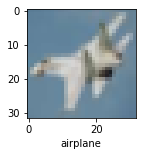

In [42]:
#Plot a sample data
cnn.plot_sample(cnn.X_test,cnn.y_test,10)

In [43]:
# verify the predictions
cnn.classes[y_classes[10]]

'airplane'

CNN has classified it correctly with an avg accuracy of 70%. The model seems to improve as the num of epochs is increased.

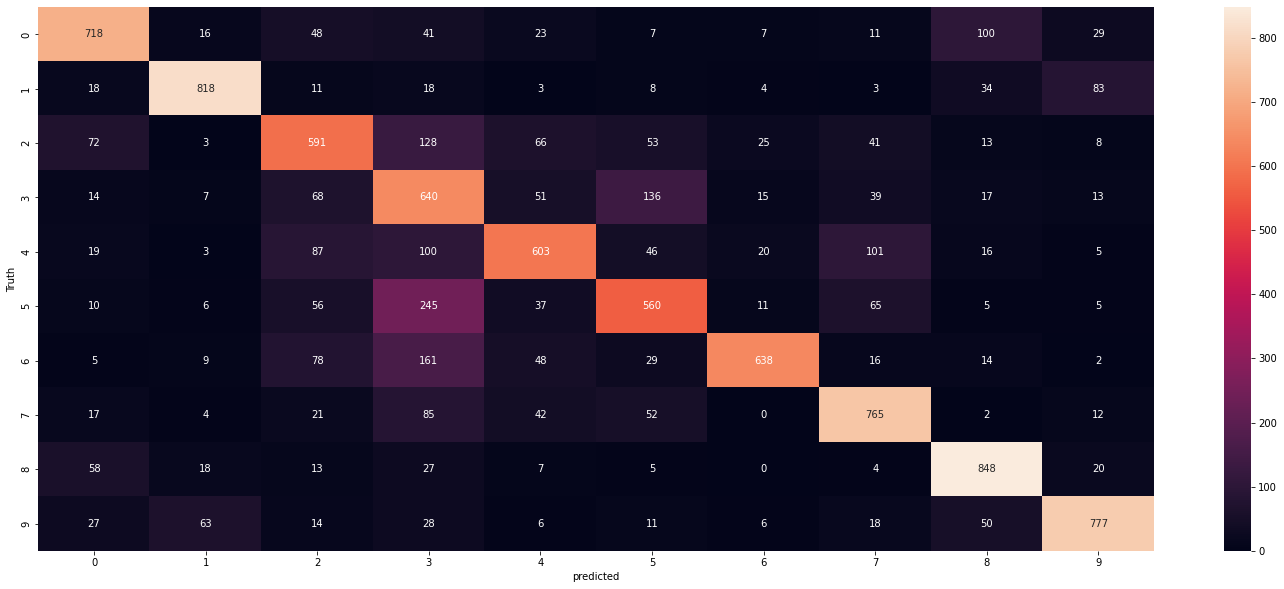

In [44]:
## Confusion Matrix for performance
cm = confusion_matrix(cnn.y_test,y_classes)
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()
